In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
%load_ext autoreload
%autoreload 2

import nnqst
from nnqst import rbm_qst, rbm_classic, utils, paper_functions, \
    generators, state_operations, state_representations, fidelities

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Research

## RBM QST

In [292]:
num_units = 2
num_hidd = 5
num_samples = 3000

#thetas = generators.random_phases(2**num_units)
thetas = [1.4,0.9,0.3,2.7]
print("Thetas:", thetas)

# quantum_system = [(0,0,1),
#                  (0,1,0),
#                  (1,0,0)]

amplitudes, phases = {}, {}

states = generators.get_all_states(num_units)
quantum_system = states

for i in range(len(states)):
    state = states[i,]
    amplitudes[tuple(state)] = 1. / np.sqrt(len(states))
    phases[tuple(state)] = thetas[i]

print(amplitudes)
main_basis = state_operations.U_ZZ(num_units)

ising_basis_set = generators.generate_Isinglike_basis_set(num_units)

dataset = generators.generate_dataset(states, ising_basis_set, amplitudes, phases, num_units, num_samples)

psi_true = {}
for state in states:
    psi_true[tuple(state)] = amplitudes[tuple(state)]*np.exp(1j * phases[tuple(state)])
print('psi_true', psi_true)    

Thetas: [1.4, 0.9, 0.3, 2.7]
{(0, 0): 0.5, (0, 1): 0.5, (1, 0): 0.5, (1, 1): 0.5}
qdict= {(0, 1): (-0.09986545924238499+0.4280494905697654j), (0, 0): (0.3978549145496639+0.4528912643505877j), (1, 0): (-0.2776699952260005+0.2439269222427046j), (1, 1): (0.5394100830597264+0.1258462791137299j)}
qdict= {(0, 1): (-0.159679852246839+0.0714612084548985j), (0, 0): (0.2798647715705024+0.6253569781383939j), (1, 0): (0.018124683736776503+0.2555837767819593j), (1, 1): (0.6574002260388878-0.0466194346740762j)}
qdict= {(0, 1): (0.3708739176366884+0.5965856559928033j), (0, 0): (0.16457463071577325+0.010646638408813969j), (1, 0): (-0.044389711392109864+0.6861715481844783j), (1, 1): (0.06867070618065294-0.042689886309308034j)}
qdict= {(0, 1): (-0.21685542517991596+0.5681814052053169j), (0, 0): (0.33704034450357934+0.12863678138797546j), (1, 0): (0.48886406061584997+0.42411994220499727j), (1, 1): (0.18666084915981443-0.21515560009711412j)}
psi_true {(0, 0): (0.08498357145012052+0.49272486499423007j), (0

In [293]:
dataset

{'HI': {(0, 0): 1069, (1, 0): 403, (0, 1): 589, (1, 1): 939},
 'IH': {(1, 1): 1302, (0, 0): 1439, (1, 0): 180, (0, 1): 79},
 'KI': {(0, 1): 1560, (1, 0): 1334, (0, 0): 86, (1, 1): 20},
 'IK': {(1, 0): 1246, (0, 1): 1141, (0, 0): 384, (1, 1): 229}}

In [294]:
len(dataset)

4

## (1/2) Amplitudes.

In [295]:
dataset_Z = generators.generate_dataset(states, ['I' * num_units], amplitudes, phases, num_units, num_samples)

r_qst = rbm_qst.RBM_QST(quantum_system, num_units, num_hidd)
r_qst.train_amplitudes(dataset_Z, max_epochs=5000, learning_rate=0.9, debug=True, precise=True)

qdict= {(0, 1): (0.3108049841353322+0.3916634548137417j), (1, 0): (0.477668244562803+0.14776010333066977j), (0, 0): (0.08498357145012052+0.49272486499423007j), (1, 1): (-0.4520360710085306+0.2136899401169149j)}
Epoch 0: objective is 1.3861918147913856
Epoch 500: objective is 1.3860433972471795
Epoch 1000: objective is 1.3859638459575763
Epoch 1500: objective is 1.3858695480578678
Epoch 2000: objective is 1.385828320483622
Epoch 2500: objective is 1.3858211591416987
Epoch 3000: objective is 1.3858204159138259
Epoch 3500: objective is 1.385820352387171
Epoch 4000: objective is 1.385820347274021
Epoch 4500: objective is 1.3858203468695525


In [296]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
basis_set

['HI', 'IH', 'KI', 'IK']

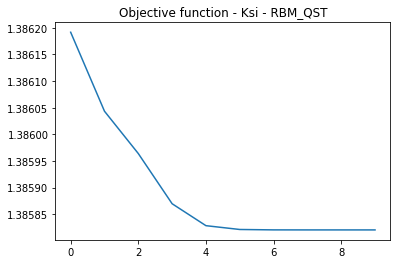

In [297]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [298]:
# Fidelity.
fid, states = fidelities.fidelity_RBM(r_qst,
                                      state_representations.into_dict(generators.ideal_w(num_units)),
                                      num_samples=2000)
fid

0.5237689821197309

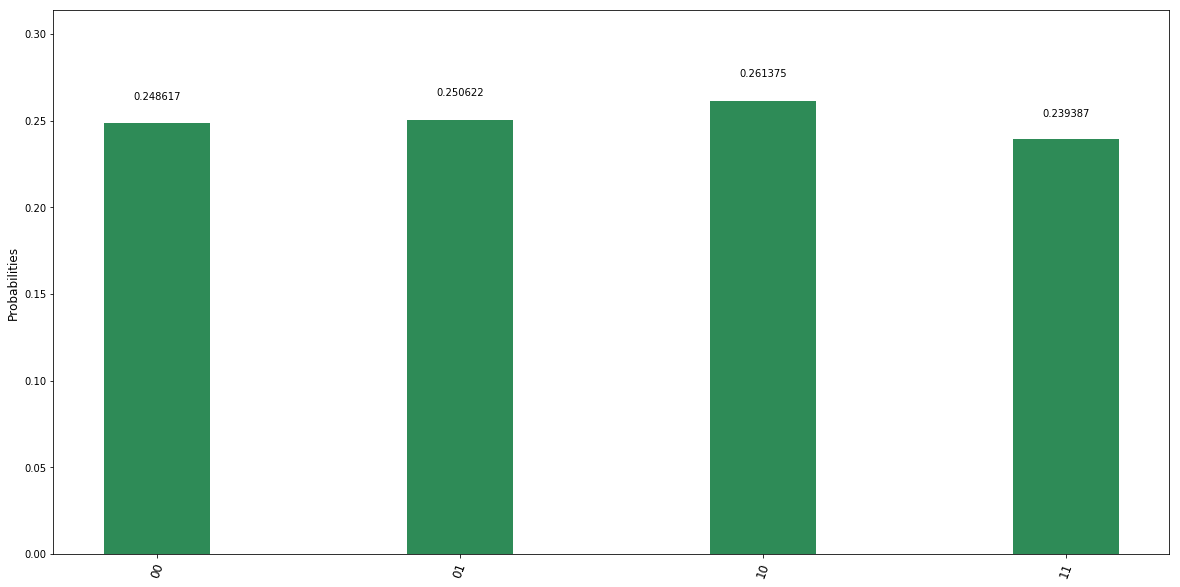

In [299]:
utils.plot_histogram(states)

In [300]:
print(r_qst.weights_lambda)

[[ 0.00000000e+00 -5.65162863e-04 -3.33821677e-03  4.59178610e-04
   7.40948908e-05  2.55247405e-03]
 [-3.44872851e-02  9.17915493e-02  4.82230674e-01 -9.58796056e-02
  -2.57969016e-02 -3.45561658e-01]
 [ 1.74627490e-02 -1.07547707e-01 -4.85504359e-01  1.12567137e-01
   3.03777597e-02  3.41724148e-01]]


## (2/2) Phases.

In [301]:
dataset

{'HI': {(0, 0): 1069, (1, 0): 403, (0, 1): 589, (1, 1): 939},
 'IH': {(1, 1): 1302, (0, 0): 1439, (1, 0): 180, (0, 1): 79},
 'KI': {(0, 1): 1560, (1, 0): 1334, (0, 0): 86, (1, 1): 20},
 'IK': {(1, 0): 1246, (0, 1): 1141, (0, 0): 384, (1, 1): 229}}

In [309]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
print(basis_set)
print(dataset)
r_qst.train_phases(dataset, basis_set=basis_set, max_epochs=5000, learning_rate=0.05, debug=True, precise=True)

['HI', 'IH', 'KI', 'IK']
{'HI': {(0, 0): 1069, (1, 0): 403, (0, 1): 589, (1, 1): 939}, 'IH': {(1, 1): 1302, (0, 0): 1439, (1, 0): 180, (0, 1): 79}, 'KI': {(0, 1): 1560, (1, 0): 1334, (0, 0): 86, (1, 1): 20}, 'IK': {(1, 0): 1246, (0, 1): 1141, (0, 0): 384, (1, 1): 229}}
Epoch 0: objective is 1.6580041493892415
Epoch 500: objective is 1.6580003807952026
Epoch 1000: objective is 1.6579969261323586
Epoch 1500: objective is 1.6579934717595726
Epoch 2000: objective is 1.6579900208465101
Epoch 2500: objective is 1.657986573600218
Epoch 3000: objective is 1.657983130030068
Epoch 3500: objective is 1.6579796901353494
Epoch 4000: objective is 1.6579762539148346
Epoch 4500: objective is 1.6579728213672629


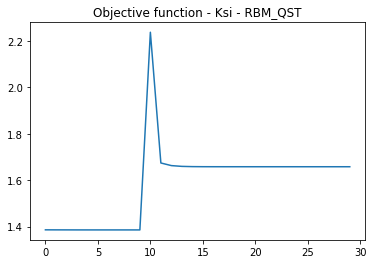

In [310]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [311]:
# Fidelity.of W state
#fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
#fid

In [312]:
# Fidelity.
fid = fidelities.fidelity_RBM_PRECISE(r_qst, psi_true)
fid

0.2560356986204182

In [313]:
r_qst.weights_mu

array([[ 0.        , -0.15205129, -0.80625623,  0.15874083,  0.04273281,
         0.58534372],
       [-7.97014776, -4.0617632 , -3.97551005, -3.93629041, -4.04183718,
        -3.97707858],
       [-1.1409196 , -0.76352914, -1.32201269, -0.42548443, -0.54525467,
        -0.08958009]])

In [314]:
#Phases
psi_rbm_lst = list(utils.psi_RBM(r_qst).values())
psi_true_lst = list(psi_true)
print(psi_true_lst)
phases_RBM = np.log(psi_rbm_lst).imag
phases_true = np.array(list(phases.values()))
print(phases_RBM%np.pi)
print(phases_true%np.pi)
print(np.array(phases_true - phases_RBM)%(2*np.pi))

[(0, 0), (0, 1), (1, 0), (1, 1)]
[1.75381478 0.66072028 2.34656703 1.7600587 ]
[1.4 0.9 0.3 2.7]
[5.92937053 0.23927972 4.23661828 0.9399413 ]


[1. 1. 1. 1.]


<Container object of 4 artists>

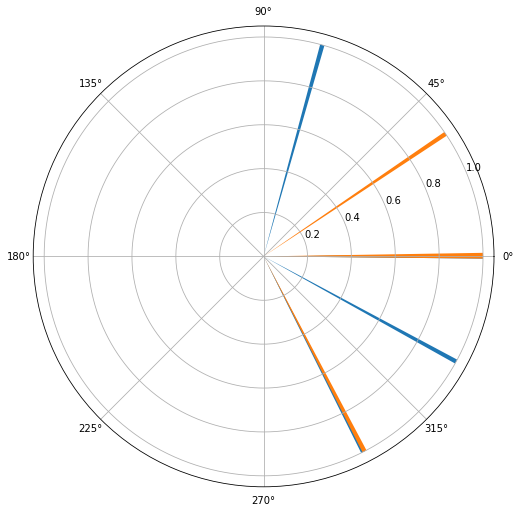

In [315]:
radii = np.ones(4)
print(radii)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.bar(phases_true - phases_true[0], radii, width=0.02, bottom=0.0)
ax.bar(phases_RBM - phases_RBM[0], radii, width=0.02, bottom=0.0)

## Classical RBM

In [231]:
r_cl = rbm_classic.RBM(num_units, 3)

In [82]:
r_cl.train(dataset["HKI"], max_epochs=3000, learning_rate=0.5, debug=True)

Epoch 0: objective is 2.089235221956695
Epoch 100: objective is 1.9282714474847888
Epoch 200: objective is 1.880321053809958
Epoch 300: objective is 1.8590352591004402
Epoch 400: objective is 1.8543552339022467
Epoch 500: objective is 1.858505210183757
Epoch 600: objective is 1.8824382593912625
Epoch 700: objective is 1.9005059691984265
Epoch 800: objective is 1.9009042524892807
Epoch 900: objective is 1.8738001551263623
Epoch 1000: objective is 1.8566430737322874
Epoch 1100: objective is 1.8667577187508575
Epoch 1200: objective is 1.8922337211414104
Epoch 1300: objective is 1.928856763024546
Epoch 1400: objective is 1.9603492196362116
Epoch 1500: objective is 1.961918595710036
Epoch 1600: objective is 1.944586230598168
Epoch 1700: objective is 1.9350972854077664
Epoch 1800: objective is 1.9264164316605117
Epoch 1900: objective is 1.921769329139505
Epoch 2000: objective is 1.9163706052034473
Epoch 2100: objective is 1.9132528472812542
Epoch 2200: objective is 1.9106768686989328
Epoch 2

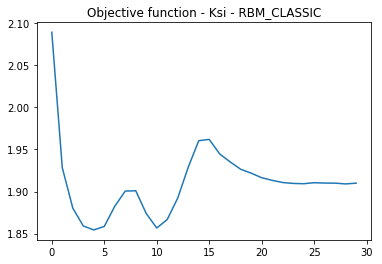

In [83]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [321]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(quantum_system), num_samples=2000)
fid

0.9991310324822074

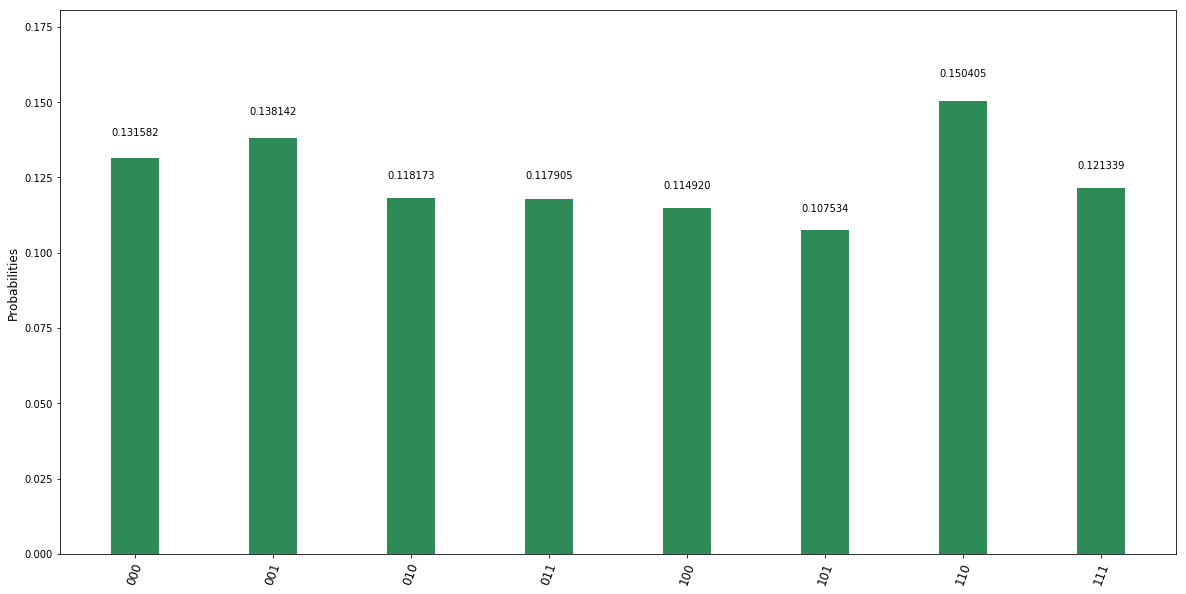

In [85]:
utils.plot_histogram(states)

# Plot Fig.1 b

In [19]:
import tqdm

num_units = 3
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


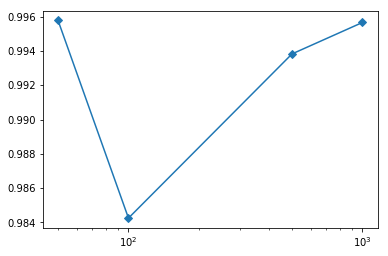

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [48]:
import tqdm

num_units = 5
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.5)

    fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))
    fidelities.append(fid)
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))


 25%|██▌       | 1/4 [00:12<00:37, 12.63s/it]

0.298996136808


 50%|█████     | 2/4 [00:24<00:25, 12.55s/it]

0.913126897567


 75%|███████▌  | 3/4 [00:36<00:12, 12.32s/it]

0.96150806699


100%|██████████| 4/4 [00:49<00:00, 12.35s/it]

0.948565339316


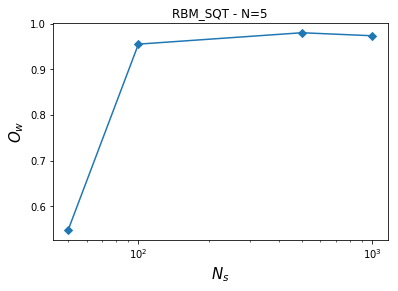

In [49]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.title('RBM_SQT - N={}'.format(num_units))
plt.xlabel('$N_s$', fontsize=15)
plt.ylabel('$O_w$', fontsize=15)
plt.show()

In [81]:
basis = 'IHIK'

In [82]:
a = [2,3,0,1]

In [86]:
basis.find('J')

-1

In [85]:
a

[2, 3, 0, 8]

In [67]:
(basis=='I').any()

AttributeError: 'bool' object has no attribute 'any'

In [83]:
a

[2, 3, 0, 1]